In [1]:
import paddlets
print(paddlets.__version__)

1.0.2


In [2]:
from paddlets.datasets.repository import get_dataset, dataset_list
print(f"built-in datasets: {dataset_list()}")

built-in datasets: ['UNI_WTH', 'ETTh1', 'ETTm1', 'ECL', 'WTH', 'NAB_TEMP', 'psm_train', 'psm_test']


In [4]:
dataset = get_dataset("UNI_WTH")
print(type(dataset))

<class 'paddlets.datasets.tsdataset.TSDataset'>


<AxesSubplot:xlabel='date'>

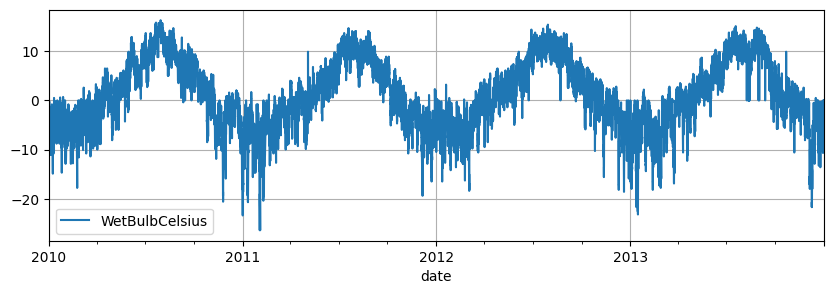

In [5]:
dataset.plot()

In [6]:
import pandas as pd
import numpy as np
from paddlets import TSDataset

<AxesSubplot:xlabel='time_col'>

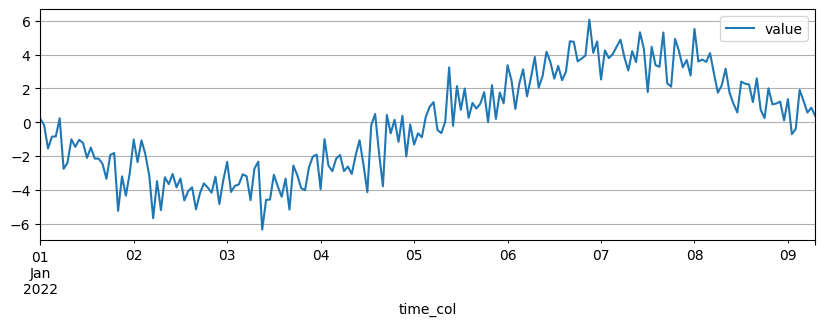

In [8]:
x = np.linspace(-np.pi, np.pi, 200)
sinx = np.sin(x) * 4 + np.random.randn(200)

df = pd.DataFrame(
    {
        'time_col': pd.date_range('2022-01-01', periods=200, freq='1h'),
        'value': sinx
    }
)

custom_dataset = TSDataset.load_from_dataframe(
    df,
    time_col = 'time_col',
    target_cols = 'value',
    freq = '1h'
)

custom_dataset.plot()

In [9]:
dataset.summary()

,WetBulbCelsius
missing,0.000000
count,35064.000000
mean,1.026081
std,6.898354
min,-26.400000
25%,-3.800000
50%,0.600000
75%,6.600000
max,16.300000


[2022-11-21 20:35:43,969] [paddlets.analysis.frequency_domain] [WARNING] It's suggested to assign a positive number to the fs parameter.


<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\envs\\time\\lib\\site-packages\\matplotlib\\pyplot.py'>

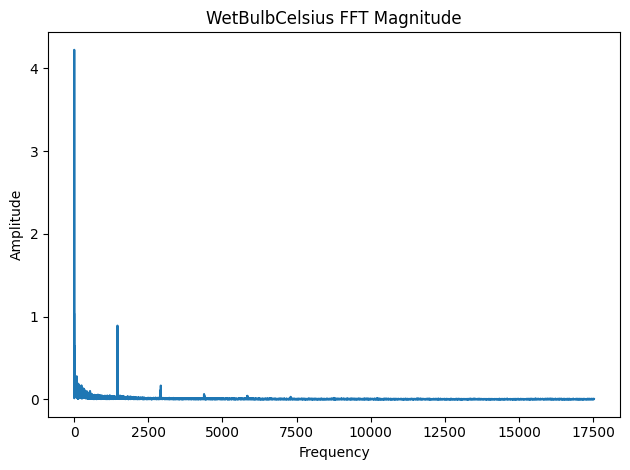

In [11]:
from paddlets.analysis import FFT
fft = FFT()
res = fft(dataset, columns="WetBulbCelsius")
fft.plot()

<AxesSubplot:xlabel='date'>

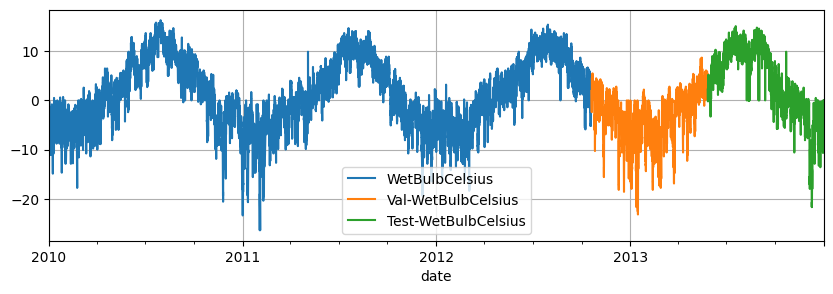

In [12]:
train_dataset, val_test_dataset = dataset.split(0.7)
val_dataset, test_dataset = val_test_dataset.split(0.5)
train_dataset.plot(add_data=[val_dataset, test_dataset], labels=['Val', 'Test'])

In [13]:
from paddlets.models.forecasting import MLPRegressor

mlp = MLPRegressor(
    in_chunk_len = 7 * 24,
    out_chunk_len = 24,
    max_epochs = 100
)

In [14]:
mlp.fit(train_dataset, val_dataset)

[2022-11-21 20:59:33,579] [paddlets.models.common.callbacks.callbacks] [INFO] epoch 000| loss: 6.614092| val_0_mae: 2.108870| 0:00:01s
[2022-11-21 20:59:34,160] [paddlets.models.common.callbacks.callbacks] [INFO] epoch 001| loss: 4.605783| val_0_mae: 1.966832| 0:00:01s
[2022-11-21 20:59:34,747] [paddlets.models.common.callbacks.callbacks] [INFO] epoch 002| loss: 4.293926| val_0_mae: 2.009339| 0:00:02s
[2022-11-21 20:59:35,326] [paddlets.models.common.callbacks.callbacks] [INFO] epoch 003| loss: 4.175919| val_0_mae: 2.067992| 0:00:03s
[2022-11-21 20:59:35,916] [paddlets.models.common.callbacks.callbacks] [INFO] epoch 004| loss: 4.029437| val_0_mae: 1.929989| 0:00:03s
[2022-11-21 20:59:36,492] [paddlets.models.common.callbacks.callbacks] [INFO] epoch 005| loss: 3.964279| val_0_mae: 1.907123| 0:00:04s
[2022-11-21 20:59:37,072] [paddlets.models.common.callbacks.callbacks] [INFO] epoch 006| loss: 3.865364| val_0_mae: 1.867870| 0:00:04s
[2022-11-21 20:59:37,652] [paddlets.models.common.callb